In [119]:
# Utility function to perform one hot encoding
def encode_and_bind(originaldataframe, featuretoencode):
    originaldataframe[featuretoencode] = originaldataframe[featuretoencode].fillna('Missing')
    dummies = pd.get_dummies(originaldataframe[[featuretoencode]])
    res = pd.concat([originaldataframe, dummies], axis=1)
    #    print(res.columns)
    return(res)

# Main cleaning function
def transform_df(df):
    # Setting index
    df.set_index('UniqueID')
    
    # Converting to Date datatype and splitting columns
    df['CurrentDate'] = pd.to_datetime(df['CurrentDate'], format = '%m/%d/%Y', errors = 'coerce')
    df['AccountDetail2'] = pd.to_datetime(df['AccountDetail2'], format = '%m/%d/%Y', errors = 'coerce')
    df['AccountStatus2'] = pd.to_datetime(df['AccountStatus2'], format = '%m/%d/%Y', errors = 'coerce')
    df['PrevAccountDetail1'] = pd.to_datetime(df['PrevAccountDetail1'], format = '%m/%d/%Y', errors = 'coerce')  
    df['AccountDetail8'] = pd.to_datetime(df['AccountDetail8'], format = '%m/%d/%Y', errors = 'coerce')
    df['Payment2'] = pd.to_datetime(df['Payment2'], format = '%m/%d/%Y', errors = 'coerce')
    df['Payment4'] = pd.to_datetime(df['Payment4'], format = '%m/%d/%Y', errors = 'coerce')
    
    df['Payment2'].fillna(df['Payment4'])
    df['AccountStatus2'].fillna(df['AccountDetail8'])
    df['PrevAccountDetail1'].fillna(df['AccountDetail2'])
    
    df['CurrentDateyear'] = df['CurrentDate'].dt.year
    df['CurrentDatemonth'] = df['CurrentDate'].dt.month
    df['AccountDetail2year'] = df['AccountDetail2'].dt.year
    df['AccountDetail2month'] = df['AccountDetail2'].dt.month
    df['AccountStatus2year'] = df['AccountStatus2'].dt.year
    df['AccountStatus2month'] = df['AccountStatus2'].dt.month
    df['PrevAccountDetail1year'] = df['PrevAccountDetail1'].dt.year
    df['PrevAccountDetail1month'] = df['PrevAccountDetail1'].dt.month
    df['AccountDetail8year'] = df['AccountDetail8'].dt.year
    df['AccountDetail8month'] = df['AccountDetail8'].dt.month
    df['Payment2year'] = df['Payment2'].dt.year
    df['Payment2month'] = df['Payment2'].dt.month
    df['Payment4year'] = df['Payment2'].dt.year
    df['Payment4month'] = df['Payment2'].dt.month
    
    
    from sklearn.impute import SimpleImputer
    mf_imputer = SimpleImputer(strategy='most_frequent')
    
    
    df[['AccountStatus2year','AccountStatus2month',
        'PrevAccountDetail1year','PrevAccountDetail1month',
        'AccountDetail8year','AccountDetail8month',
        'Payment2year','Payment2month',
        'Payment4year','Payment4month']] = mf_imputer.fit_transform(df[['AccountStatus2year','AccountStatus2month',
                                                                        'PrevAccountDetail1year',
                                                                        'PrevAccountDetail1month',
                                                                        'AccountDetail8year',
                                                                        'AccountDetail8month','Payment2year',
                                                                        'Payment2month',
                                                                        'Payment4year','Payment4month']])
    
    # One Hot Encoding Columns
    df = encode_and_bind(df, 'AccountStatus1')
    df = encode_and_bind(df, 'PrevAccountStatus1')
    df = encode_and_bind(df, 'PrevAccountStatus2')
    
    # Label Encoding Columns
    from sklearn.preprocessing import LabelEncoder
    labelencoder = LabelEncoder()
    df['AccountDetail5'].fillna('NaN',inplace=True)
    df['AccountDetail6'].fillna('NaN',inplace=True)
    df['AccountDetail5cat'] = labelencoder.fit_transform(df['AccountDetail5'])
    df['AccountDetail6cat'] = labelencoder.fit_transform(df['AccountDetail6'])
    
    # Dropping Unnecessary columns
    df.drop(['CurrentDate','AccountDetail2',
             'AccountStatus2', 'PrevAccountDetail1',
             'AccountDetail8','Payment2','Payment4',
             'PrevAccountStatus1','AccountStatus1',
             'PrevAccountStatus2','AccountDetail5',
             'AccountDetail6','AccountStatus1_Missing',
             'PrevAccountStatus1_Missing','PrevAccountStatus2_Missing',
             'UniqueID'],axis=1,inplace=True)
    
    df[['AccountActivity4','AccountActivity7',
        'HistoricalAccountActivity4','HistoricalAccountActivity7',
        'HistoricalAccountDetail2','HistoricalAccountDetail3',
        'HistoricalAccountDetail4','HistoricalAccountStatus1',
        'HistoricalAccountStatus2','HistoricalAccountStatus3',
        'HistoricalAccountStatus4','HistoricalAccountStatus5','HistoricalAccountStatus6',
        'HistoricalAccountStatus7','HistoricalAccountStatus8','HistoricalAccountStatus9',
        'HistoricalAccountStatus10','HistoricalAccountStatus11','HistoricalAccountStatus12',
        'HistoricalAccountStatus13','HistoricalAccountStatus14']] = df[['AccountActivity4','AccountActivity7',
                                                                        'HistoricalAccountActivity4','HistoricalAccountActivity7',
                                                                        'HistoricalAccountDetail2','HistoricalAccountDetail3',
                                                                        'HistoricalAccountDetail4','HistoricalAccountStatus1',
                                                                        'HistoricalAccountStatus2','HistoricalAccountStatus3',
                                                                        'HistoricalAccountStatus4','HistoricalAccountStatus5','HistoricalAccountStatus6',
                                                                        'HistoricalAccountStatus7','HistoricalAccountStatus8','HistoricalAccountStatus9',
                                                                        'HistoricalAccountStatus10','HistoricalAccountStatus11','HistoricalAccountStatus12',
                                                                        'HistoricalAccountStatus13','HistoricalAccountStatus14']].interpolate()
    
    df[['AccountActivity3','AccountActivity4',
        'AccountActivity5','AccountActivity6',
        'AccountActivity7','Balance1','Balance2','Payment1','PrevBalance1']] = df[['AccountActivity3','AccountActivity4','AccountActivity5',
                                                                                   'AccountActivity6','AccountActivity7','Balance1','Balance2',
                                                                                   'Payment1','PrevBalance1']].interpolate()
    
    
    df[['HistoricalAccountActivity1','HistoricalAccountActivity2',
        'HistoricalAccountActivity3','HistoricalAccountActivity4',
        'HistoricalAccountActivity5','HistoricalAccountActivity6',
        'HistoricalAccountActivity7','HistoricalAccountActivity8']] = df[['HistoricalAccountActivity1','HistoricalAccountActivity2',
                                                                          'HistoricalAccountActivity3','HistoricalAccountActivity4',
                                                                          'HistoricalAccountActivity5','HistoricalAccountActivity6',
                                                                          'HistoricalAccountActivity7','HistoricalAccountActivity8']].interpolate()
    
    df[['HistoricalAccountDetail1','HistoricalAccountDetail2',
        'HistoricalAccountDetail3','HistoricalAccountDetail4']] =  df[['HistoricalAccountDetail1','HistoricalAccountDetail2',
                                                                       'HistoricalAccountDetail3','HistoricalAccountDetail4']].interpolate()
    
    df[['HistoricalAccountStatus1','HistoricalAccountStatus2','HistoricalAccountStatus3',
       'HistoricalAccountStatus4','HistoricalAccountStatus5','HistoricalAccountStatus6',
       'HistoricalAccountStatus7','HistoricalAccountStatus8','HistoricalAccountStatus9',
       'HistoricalAccountStatus10','HistoricalAccountStatus11','HistoricalAccountStatus12',
       'HistoricalAccountStatus13','HistoricalAccountStatus14']] =     df[['HistoricalAccountStatus1','HistoricalAccountStatus2','HistoricalAccountStatus3',
                                                                           'HistoricalAccountStatus4','HistoricalAccountStatus5','HistoricalAccountStatus6',
                                                                           'HistoricalAccountStatus7','HistoricalAccountStatus8','HistoricalAccountStatus9',
                                                                           'HistoricalAccountStatus10','HistoricalAccountStatus11','HistoricalAccountStatus12',
                                                                           'HistoricalAccountStatus13','HistoricalAccountStatus14']].interpolate()
    
    df[['HistoricalBalance1','Payment3']] = df[['HistoricalBalance1','Payment3']].interpolate()
    
    cols_with_nans = df.columns[df.isna().any()].tolist()
    df[cols_with_nans] = mf_imputer.fit_transform(df[cols_with_nans])
    
    return df

In [120]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn import base

# read in our data
df = pd.read_csv('/Users/naveenmsu/Desktop/Competition/DSU Competition Development Data.csv')
final_df = pd.read_csv('/Users/naveenmsu/Desktop/Competition/DSU Competition Out-Of-Time Data.csv')

# set seed for reproducibility
np.random.seed(0)

In [121]:
df.describe()

,UniqueID,AccountActivity1,AccountActivity2,AccountDetail1,AccountDetail3,AccountDetail4,AccountDetail7,AccountActivity3,AccountActivity4,AccountActivity5,...,HistoricalAccountStatus8,HistoricalAccountStatus9,HistoricalAccountStatus10,HistoricalAccountStatus11,HistoricalAccountStatus12,HistoricalAccountStatus13,HistoricalAccountStatus14,HistoricalBalance1,Payment3,Target
count,3.000000e+05,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,285827.000000,285827.000000,285827.000000,...,298851.000000,298851.000000,298851.000000,298851.000000,298851.000000,298851.000000,298851.000000,298851.000000,298851.000000,300000.000000
mean,3.344771e+07,0.024937,10.114659,1.069627,742.419517,0.748793,310.517683,54.641119,7.087992,3.392928,...,0.059816,0.037433,5.604803,0.467286,0.116697,0.195188,0.006666,680.991303,84.880670,0.500000
std,1.192330e+06,0.221860,23.898865,0.267331,510.977571,2.158456,491.488608,122.612800,11.257088,36.160656,...,0.284251,0.276817,3.417085,0.842026,0.370455,0.581047,0.081370,448.977515,141.200283,0.500001
min,2.616575e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.333512e+07,0.000000,0.000000,1.000000,350.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,396.000000,30.000000,0.000000
50%,3.380844e+07,0.000000,0.000000,1.000000,500.000000,0.000000,0.000000,4.950000,0.000000,0.000000,...,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,546.000000,50.000000,0.500000
75%,3.412194e+07,0.000000,0.000000,1.000000,850.000000,0.000000,500.000000,65.980000,25.000000,0.000000,...,0.000000,0.000000,8.000000,1.000000,0.000000,0.000000,0.000000,830.000000,80.000000,1.000000
max,3.448522e+07,2.000000,152.740000,5.000000,15000.000000,9.000000,10000.000000,2899.620000,25.000000,2528.000000,...,12.000000,11.000000,13.000000,11.000000,8.000000,9.000000,1.000000,7968.000000,3548.160000,1.000000


In [ ]:
df_int_cols=[x for x in df.columns if df[x].dtype == int]
df_obj_cols=[x for x in df.columns if df[x].dtype == object]
df_rem_cols=[x for x in df.columns if x not in df_int_cols and x not in df_obj_cols]

In [122]:
new_df = transform_df(df)

In [123]:
new_df['HistoricalAccountStatus3'].isna().sum()

0

array([[<AxesSubplot:title={'center':'AccountActivity1'}>,
        <AxesSubplot:title={'center':'AccountActivity2'}>,
        <AxesSubplot:title={'center':'AccountDetail1'}>,
        <AxesSubplot:title={'center':'AccountDetail3'}>,
        <AxesSubplot:title={'center':'AccountDetail4'}>,
        <AxesSubplot:title={'center':'AccountDetail7'}>,
        <AxesSubplot:title={'center':'AccountActivity3'}>,
        <AxesSubplot:title={'center':'AccountActivity4'}>,
        <AxesSubplot:title={'center':'AccountActivity5'}>],
       [<AxesSubplot:title={'center':'AccountActivity6'}>,
        <AxesSubplot:title={'center':'AccountActivity7'}>,
        <AxesSubplot:title={'center':'Balance1'}>,
        <AxesSubplot:title={'center':'Balance2'}>,
        <AxesSubplot:title={'center':'Payment1'}>,
        <AxesSubplot:title={'center':'PrevBalance1'}>,
        <AxesSubplot:title={'center':'HistoricalAccountActivity1'}>,
        <AxesSubplot:title={'center':'HistoricalAccountActivity2'}>,
        <Axe

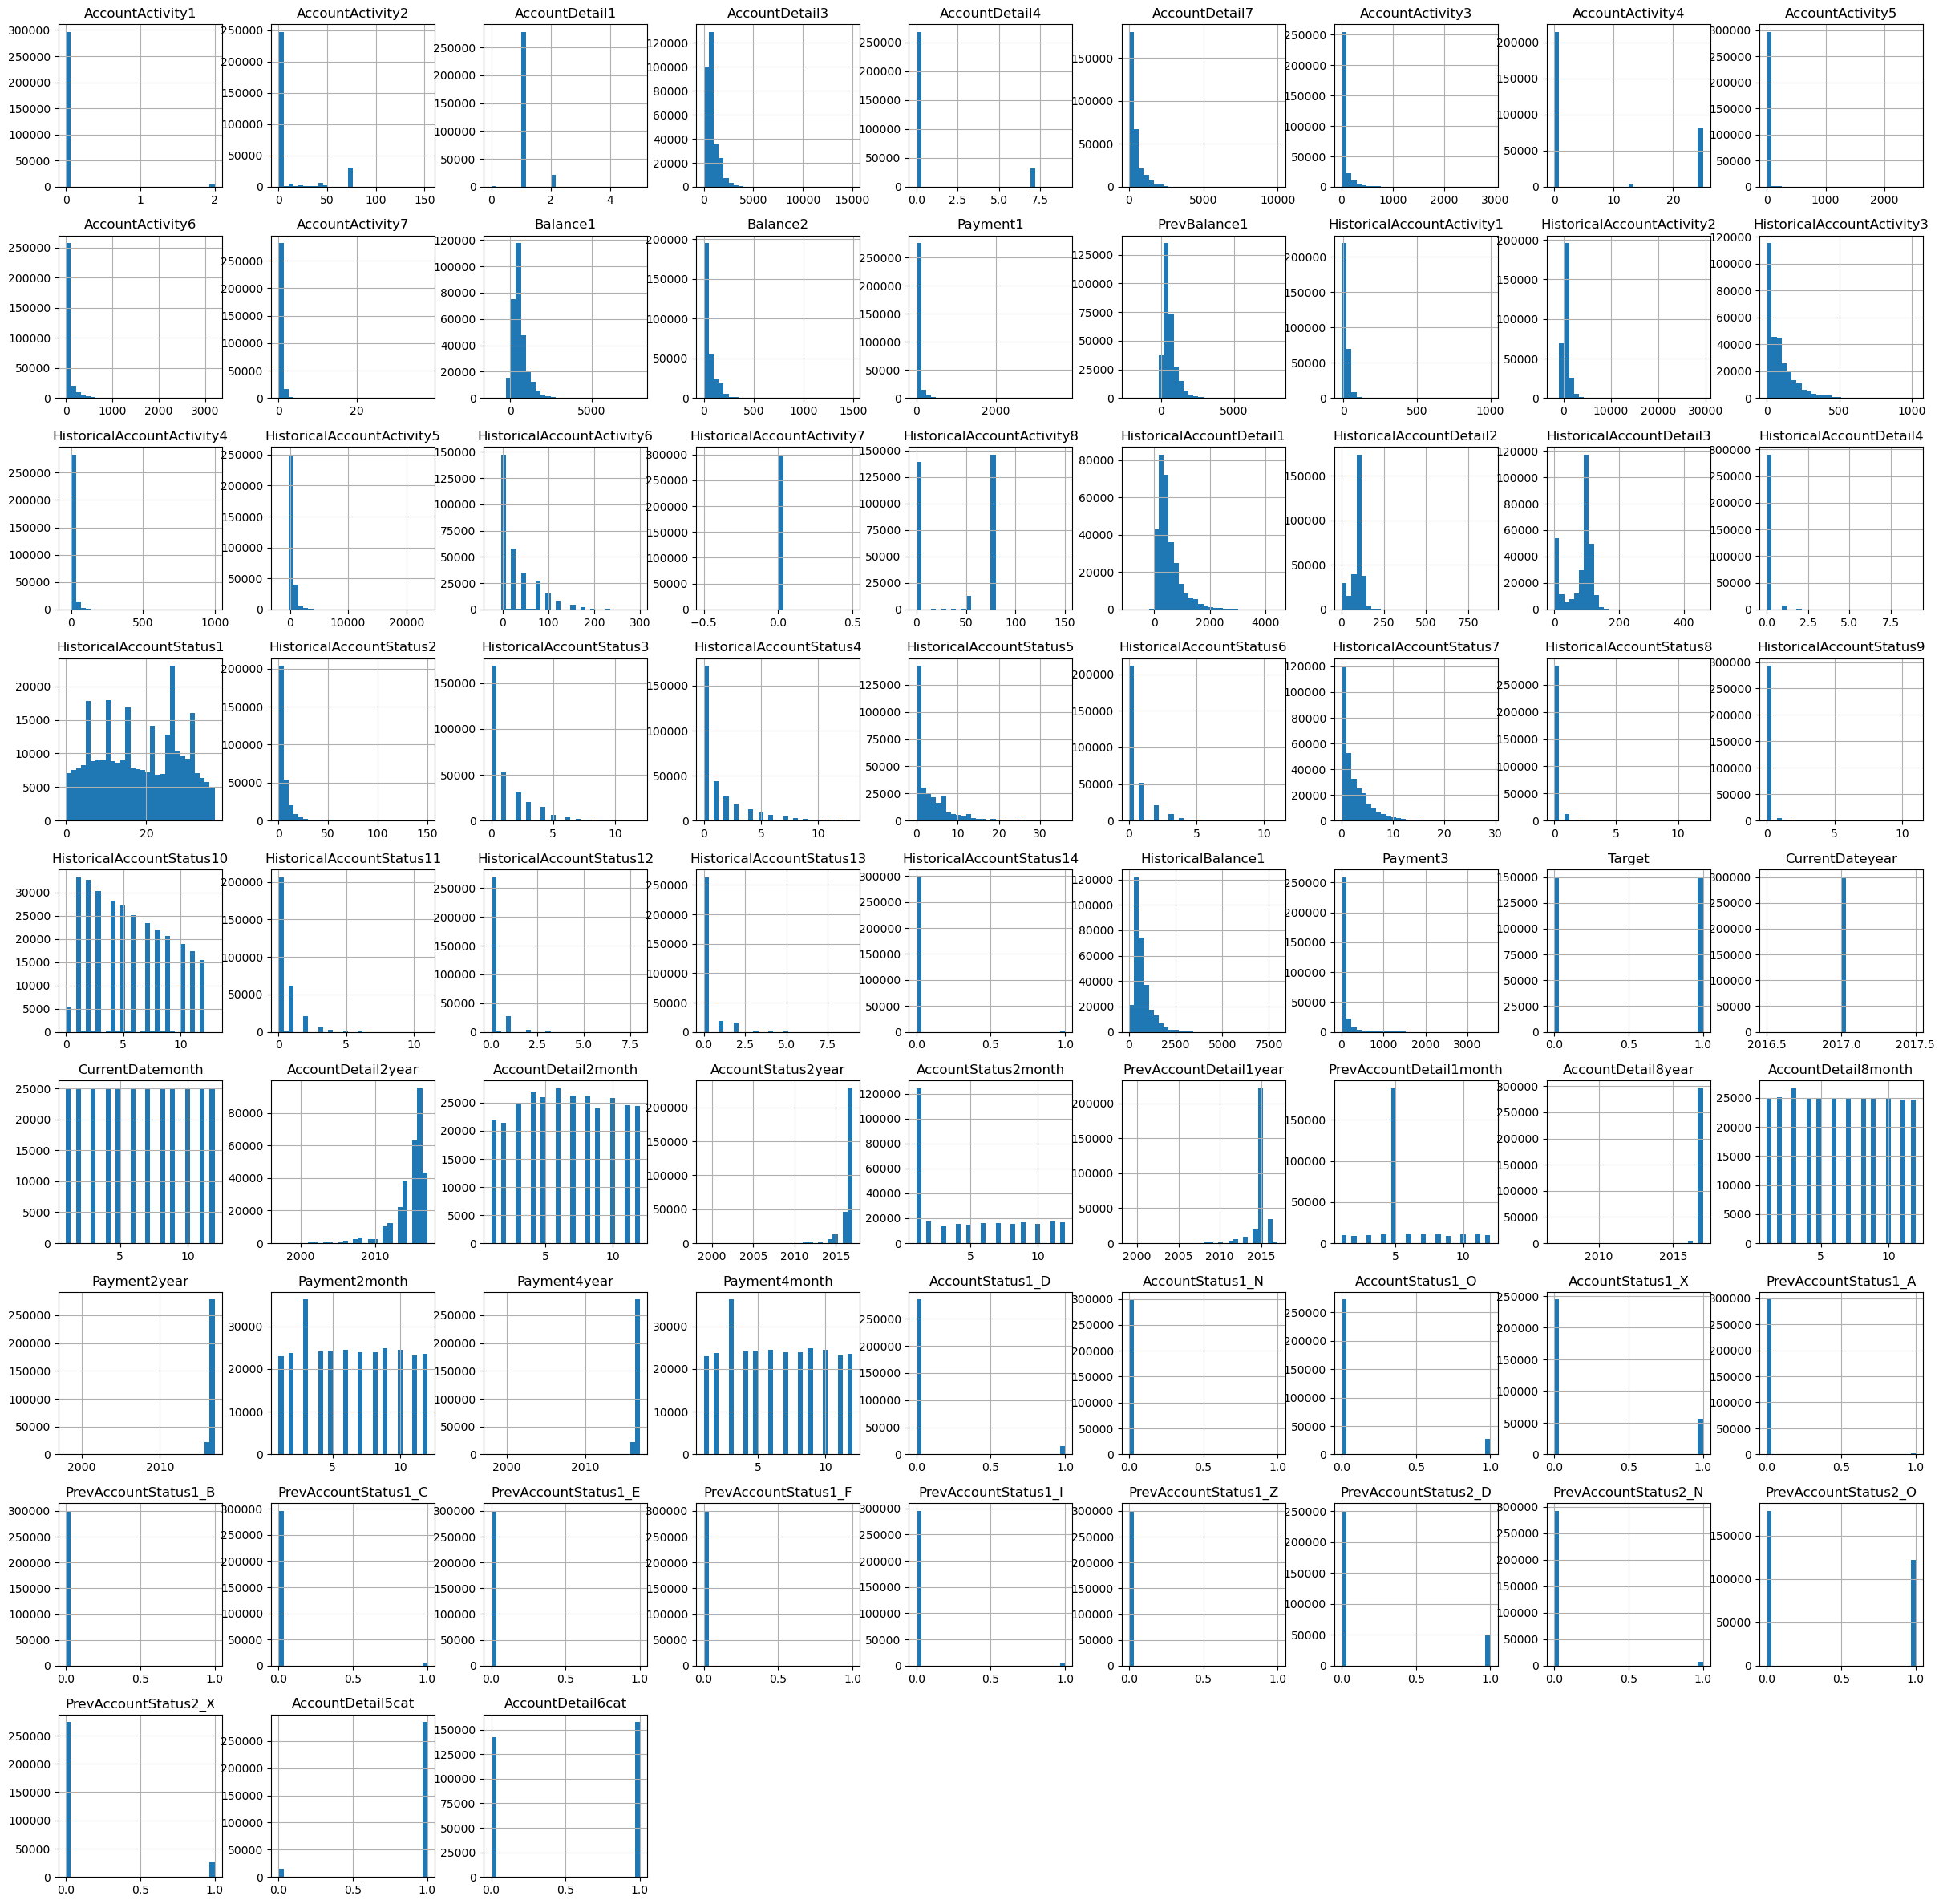

In [103]:
new_df.hist(bins = 30, figsize=(30,30))

############################################################################################
############       F A S T   F E A T U R E  E N G G    A N D    S E L E C T I O N ! ########
# Be judicious with featurewiz. Don't use it to create too many un-interpretable features! #
############################################################################################
featurewiz has selected 0.8 as the correlation limit. Change this limit to fit your needs...
Skipping feature engineering since no feature_engg input...
Skipping category encoding since no category encoders specified in input...
    Since dask_xgboost_flag is True, reducing memory size and loading into dask
    Loaded train data. Shape = (300000, 75)
#### Single_Label Binary_Classification problem ####
No test data filename given...
Classifying features using a random sample of 10000 rows from dataset...
#### Single_Label Binary_Classification problem ####
    loading a random sample of 10000 rows into pandas for EDA
###

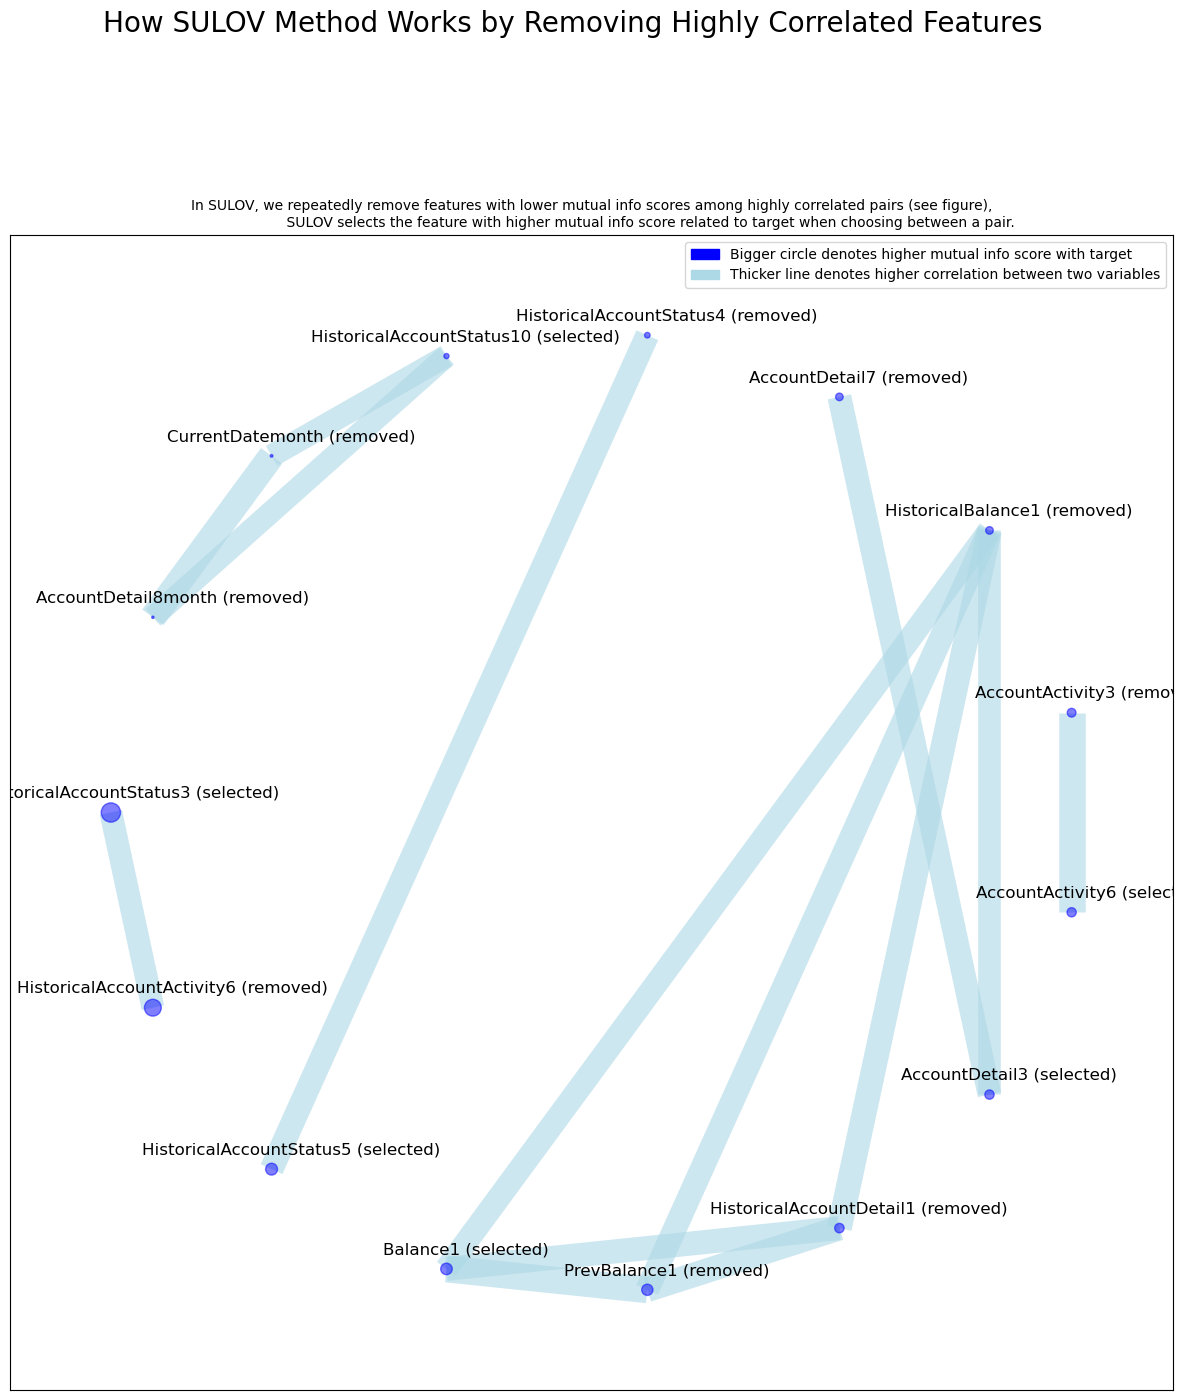

Time taken for SULOV method = 22 seconds
    Adding 0 categorical variables to reduced numeric variables  of 60
Finally 60 vars selected after SULOV
Converting all features to numeric before sending to XGBoost...
#######################################################################################
#####    R E C U R S I V E   X G B O O S T : F E A T U R E   S E L E C T I O N  #######
#######################################################################################
    using regular XGBoost
Current number of predictors before recursive XGBoost = 60 
    Taking top 10 features per iteration...
    XGBoost version using 1.7.1 as tree method: hist
Number of booster rounds = 20
        using 60 variables...
            selecting 25 features in this iteration
            Time taken for regular XGBoost feature selection = 1 seconds
        using 48 variables...
            selecting 21 features in this iteration
            Time taken for regular XGBoost feature selection = 0 seconds


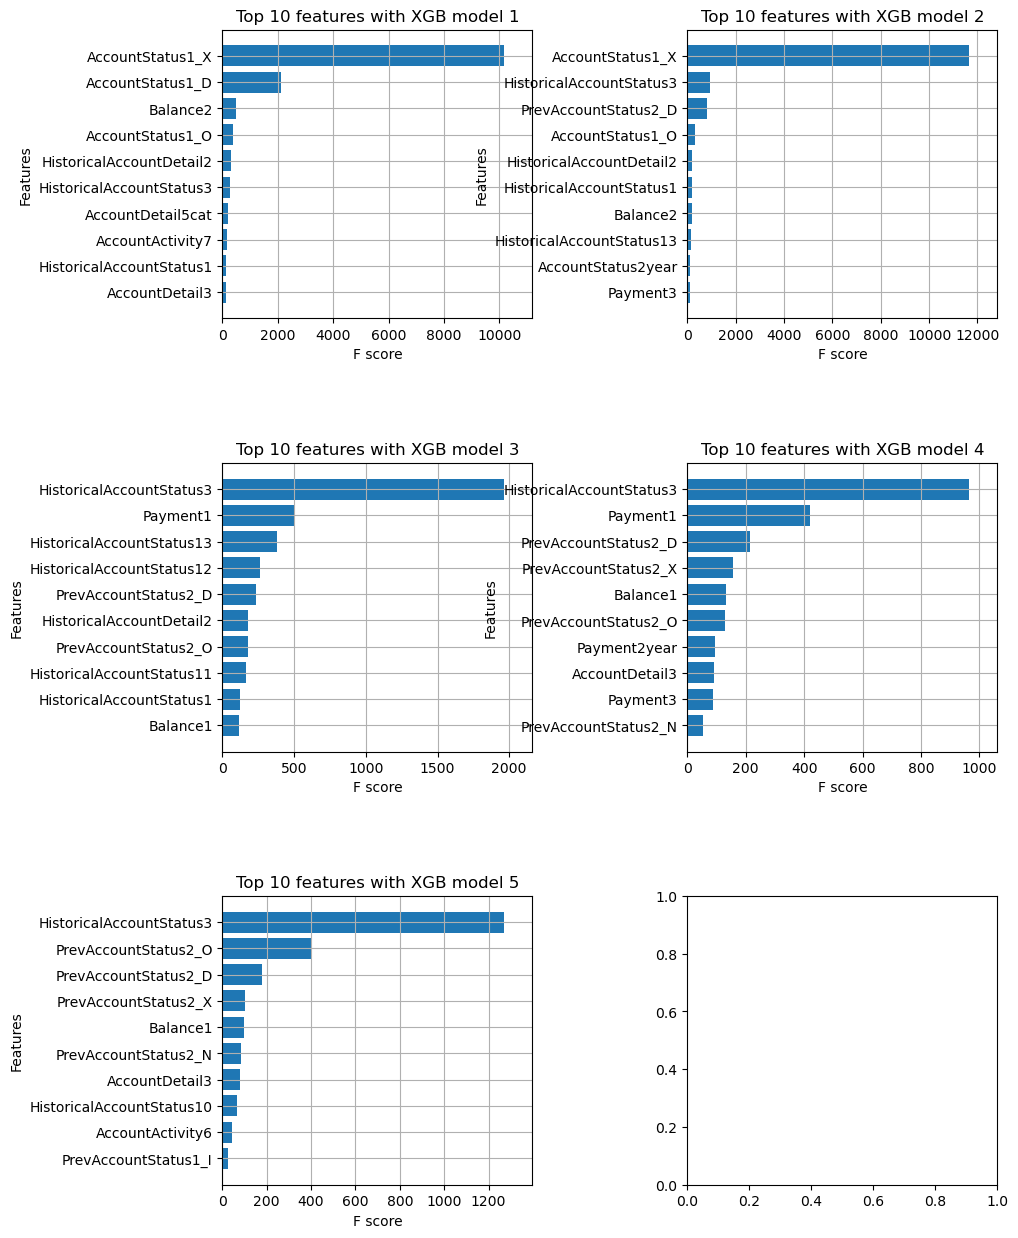

    Completed XGBoost feature selection in 1 seconds
#######################################################################################
#####          F E A T U R E   S E L E C T I O N   C O M P L E T E D            #######
#######################################################################################
Selected 30 important features:
['AccountStatus1_X', 'AccountStatus1_D', 'Balance2', 'AccountStatus1_O', 'HistoricalAccountDetail2', 'HistoricalAccountStatus3', 'AccountDetail5cat', 'AccountActivity7', 'HistoricalAccountStatus1', 'AccountDetail3', 'AccountActivity2', 'HistoricalAccountStatus13', 'PrevAccountStatus2_D', 'Balance1', 'Payment3', 'Payment1', 'AccountStatus2year', 'AccountActivity4', 'HistoricalAccountStatus12', 'HistoricalAccountStatus11', 'HistoricalAccountStatus10', 'HistoricalAccountActivity5', 'AccountDetail6cat', 'HistoricalAccountStatus6', 'HistoricalAccountStatus9', 'PrevAccountStatus2_X', 'PrevAccountStatus2_O', 'PrevAccountStatus1_I', 'Payment2year', 'P

In [124]:
from featurewiz import featurewiz
target = 'Target'
feats, train = featurewiz(new_df, target,corr_limit=0.8, 
                          verbose=2, sep=",", header=0,test_data="", 
                          feature_engg="", category_encoders="",
                          dask_xgboost_flag=True, nrows=None, skip_sulov=False)

In [125]:
train.shape

(300000, 31)

In [126]:
new_df = train

In [127]:
feats

['AccountStatus1_X',
 'AccountStatus1_D',
 'Balance2',
 'AccountStatus1_O',
 'HistoricalAccountDetail2',
 'HistoricalAccountStatus3',
 'AccountDetail5cat',
 'AccountActivity7',
 'HistoricalAccountStatus1',
 'AccountDetail3',
 'AccountActivity2',
 'HistoricalAccountStatus13',
 'PrevAccountStatus2_D',
 'Balance1',
 'Payment3',
 'Payment1',
 'AccountStatus2year',
 'AccountActivity4',
 'HistoricalAccountStatus12',
 'HistoricalAccountStatus11',
 'HistoricalAccountStatus10',
 'HistoricalAccountActivity5',
 'AccountDetail6cat',
 'HistoricalAccountStatus6',
 'HistoricalAccountStatus9',
 'PrevAccountStatus2_X',
 'PrevAccountStatus2_O',
 'PrevAccountStatus1_I',
 'Payment2year',
 'PrevAccountStatus2_N']

In [ ]:
lol = train['Target'].copy()

In [ ]:
erron_data = new_df[['AccountActivity1', 'AccountActivity2',
                     'AccountDetail4','HistoricalAccountStatus14']]

In [ ]:
new_df[df_int_cols].describe()

In [ ]:
new_df['AccountDetail7'].dtype

In [128]:
from sklearn.preprocessing import RobustScaler
new_df['AccountDetail3'] = RobustScaler().fit_transform(new_df['AccountDetail3'].to_numpy().reshape(-1, 1))
# new_df['AccountDetail7'] = RobustScaler().fit_transform(new_df['AccountDetail7'].to_numpy().reshape(-1, 1))

In [129]:
new_df.describe()

,AccountStatus1_X,AccountStatus1_D,Balance2,AccountStatus1_O,HistoricalAccountDetail2,HistoricalAccountStatus3,AccountDetail5cat,AccountActivity7,HistoricalAccountStatus1,AccountDetail3,...,HistoricalAccountActivity5,AccountDetail6cat,HistoricalAccountStatus6,HistoricalAccountStatus9,PrevAccountStatus2_X,PrevAccountStatus2_O,PrevAccountStatus1_I,Payment2year,PrevAccountStatus2_N,Target
count,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,...,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000
mean,0.185543,0.049870,59.671270,0.092643,90.826078,1.019475,0.948087,0.754340,18.276587,0.484839,...,353.798293,0.525357,0.496317,0.037420,0.087867,0.405030,0.016883,2016.923233,0.026177,0.500000
std,0.388738,0.217677,55.266183,0.289932,33.735814,1.537401,0.221852,0.583071,10.081273,1.021955,...,522.823826,0.499357,0.947784,0.276517,0.283101,0.490899,0.128835,0.305353,0.159661,0.500001
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,...,-1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1998.000000,0.000000,0.000000
25%,0.000000,0.000000,30.000000,0.000000,84.000000,0.000000,1.000000,0.000000,9.000000,-0.300000,...,75.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,0.000000,0.000000
50%,0.000000,0.000000,30.000000,0.000000,100.000000,0.000000,1.000000,1.000000,18.000000,0.000000,...,203.895000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,0.000000,0.500000
75%,0.000000,0.000000,69.000000,0.000000,109.000000,2.000000,1.000000,1.000000,27.000000,0.700000,...,464.842500,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,2017.000000,0.000000,1.000000
max,1.000000,1.000000,1490.000000,1.000000,880.000000,12.000000,1.000000,38.000000,37.000000,29.000000,...,23592.540000,1.000000,11.000000,11.000000,1.000000,1.000000,1.000000,2017.000000,1.000000,1.000000


In [ ]:
new_df[df_rem_cols] = RobustScaler().fit_transform(new_df[df_rem_cols].to_numpy())

In [ ]:
new_df[df_rem_cols].describe()

In [ ]:
new_df.shape, new_df[df_rem_cols].shape, new_df[df_int_cols].shape

In [ ]:
new_df = new_df.sample(frac=1, random_state=1)
new_df

In [53]:
new_df.describe()

,AccountActivity2,AccountActivity4,AccountDetail3,AccountDetail5cat,AccountStatus1_D,AccountStatus1_O,AccountStatus1_X,AccountStatus2month,AccountStatus2year,Balance1,...,HistoricalAccountStatus9,Payment1,Payment2year,Payment3,PrevAccountDetail1year,PrevAccountStatus1_I,PrevAccountStatus2_D,PrevAccountStatus2_O,PrevAccountStatus2_X,Target
count,3.000000e+05,3.000000e+05,300000.000000,300000.000000,3.000000e+05,3.000000e+05,3.000000e+05,3.000000e+05,3.000000e+05,3.000000e+05,...,3.000000e+05,3.000000e+05,3.000000e+05,3.000000e+05,3.000000e+05,3.000000e+05,3.000000e+05,3.000000e+05,3.000000e+05,300000.000000
mean,-5.540191e-15,1.784626e-14,742.419517,0.948087,-3.449344e-15,-3.807692e-15,9.243019e-15,-3.990312e-16,-4.628977e-14,1.173821e-15,...,5.640966e-15,-5.577674e-16,-3.482963e-13,-5.341254e-16,7.474897e-14,1.177460e-14,-5.147947e-15,-7.195039e-15,-8.066939e-15,0.500000
std,1.000002e+00,1.000002e+00,510.977571,0.221852,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,...,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,0.500001
min,-4.232283e-01,-6.089188e-01,0.000000,0.000000,-2.291016e-01,-3.195347e-01,-4.772970e-01,-2.020147e+00,-1.700252e+01,-4.089309e+00,...,-1.349640e-01,-4.930225e-01,-6.197174e+01,-6.012740e-01,-1.319159e+01,-1.310468e-01,-4.432471e-01,-8.250800e-01,-3.103723e-01,0.000000
25%,-4.232283e-01,-6.089188e-01,350.000000,1.000000,-2.291016e-01,-3.195347e-01,-4.772970e-01,-6.027819e-01,4.048139e-01,-5.769076e-01,...,-1.349640e-01,-4.930225e-01,2.514033e-01,-3.884263e-01,1.761788e-01,-1.310468e-01,-4.432471e-01,-8.250800e-01,-3.103723e-01,0.000000
50%,-4.232283e-01,-6.089188e-01,500.000000,1.000000,-2.291016e-01,-3.195347e-01,-4.772970e-01,1.059008e-01,4.048139e-01,-2.481383e-01,...,-1.349640e-01,-2.249125e-01,2.514033e-01,-2.465278e-01,1.761788e-01,-1.310468e-01,-4.432471e-01,-8.250800e-01,-3.103723e-01,0.500000
75%,-4.232283e-01,1.645290e+00,850.000000,1.000000,-2.291016e-01,-3.195347e-01,-4.772970e-01,4.602422e-01,4.048139e-01,3.322349e-01,...,-1.349640e-01,1.638646e-02,2.514033e-01,-3.368015e-02,1.761788e-01,-1.310468e-01,-4.432471e-01,1.212004e+00,-3.103723e-01,1.000000
max,5.967881e+00,1.645290e+00,15000.000000,1.000000,4.364875e+00,3.129550e+00,2.095132e+00,1.877608e+00,4.048139e-01,1.724335e+01,...,3.967742e+01,3.303306e+01,2.514033e-01,2.457265e+01,1.847150e+00,7.630859e+00,2.256078e+00,1.212004e+00,3.221937e+00,1.000000


In [130]:
from sklearn.preprocessing import StandardScaler 
for x in new_df.columns:
    if new_df[x].dtype != int:
        new_df[x] = StandardScaler().fit_transform(new_df[x].to_numpy().reshape(-1,1))

In [131]:
new_df.describe()

,AccountStatus1_X,AccountStatus1_D,Balance2,AccountStatus1_O,HistoricalAccountDetail2,HistoricalAccountStatus3,AccountDetail5cat,AccountActivity7,HistoricalAccountStatus1,AccountDetail3,...,HistoricalAccountActivity5,AccountDetail6cat,HistoricalAccountStatus6,HistoricalAccountStatus9,PrevAccountStatus2_X,PrevAccountStatus2_O,PrevAccountStatus1_I,Payment2year,PrevAccountStatus2_N,Target
count,3.000000e+05,3.000000e+05,3.000000e+05,3.000000e+05,3.000000e+05,3.000000e+05,300000.000000,3.000000e+05,3.000000e+05,3.000000e+05,...,3.000000e+05,300000.000000,3.000000e+05,3.000000e+05,3.000000e+05,3.000000e+05,3.000000e+05,3.000000e+05,3.000000e+05,300000.000000
mean,9.243019e-15,-3.449344e-15,6.867584e-16,-3.807692e-15,2.496324e-15,4.888033e-14,0.948087,2.273551e-14,-3.344905e-15,-2.936421e-15,...,-4.773677e-15,0.525357,1.539198e-14,2.568342e-15,-8.066939e-15,-7.195039e-15,1.177460e-14,-3.482963e-13,-6.043322e-15,0.500000
std,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,0.221852,1.000002e+00,1.000002e+00,1.000002e+00,...,1.000002e+00,0.499357,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,0.500001
min,-4.772970e-01,-2.291016e-01,-1.079709e+00,-3.195347e-01,-2.692279e+00,-6.631171e-01,0.000000,-1.293739e+00,-1.812928e+00,-1.452942e+00,...,-4.406460e+00,0.000000,-5.236607e-01,-1.353264e-01,-3.103723e-01,-8.250800e-01,-1.310468e-01,-6.197174e+01,-1.639521e-01,0.000000
25%,-4.772970e-01,-2.291016e-01,-5.368802e-01,-3.195347e-01,-2.023396e-01,-6.631171e-01,1.000000,-1.293739e+00,-9.201817e-01,-7.679792e-01,...,-5.332556e-01,0.000000,-5.236607e-01,-1.353264e-01,-3.103723e-01,-8.250800e-01,-1.310468e-01,2.514033e-01,-1.639521e-01,0.000000
50%,-4.772970e-01,-2.291016e-01,-5.368802e-01,-3.195347e-01,2.719347e-01,-6.631171e-01,1.000000,4.213219e-01,-2.743574e-02,-4.744238e-01,...,-2.867190e-01,1.000000,-5.236607e-01,-1.353264e-01,-3.103723e-01,-8.250800e-01,-1.310468e-01,2.514033e-01,-1.639521e-01,0.500000
75%,-4.772970e-01,-2.291016e-01,1.687966e-01,-3.195347e-01,5.387139e-01,6.377821e-01,1.000000,4.213219e-01,8.653102e-01,2.105389e-01,...,2.123935e-01,1.000000,5.314333e-01,-1.353264e-01,-3.103723e-01,1.212004e+00,-1.310468e-01,2.514033e-01,-1.639521e-01,1.000000
max,2.095132e+00,4.364875e+00,2.588077e+01,3.129550e+00,2.339280e+01,7.142278e+00,1.000000,6.387858e+01,1.857250e+00,2.790260e+01,...,4.444859e+01,1.000000,1.108237e+01,3.964529e+01,3.221937e+00,1.212004e+00,7.630859e+00,2.514033e-01,6.099341e+00,1.000000


In [ ]:
lol = new_df['Target'].copy()

In [132]:
train, test, val = new_df[:240000], new_df[240000:280000], new_df[280000:]
train['Target'].value_counts(), test['Target'].value_counts(), val['Target'].value_counts()

(0    121684
 1    118316
 Name: Target, dtype: int64,
 1    20812
 0    19188
 Name: Target, dtype: int64,
 1    10872
 0     9128
 Name: Target, dtype: int64)

In [133]:
train_np, test_np, val_np = train.to_numpy(), test.to_numpy(), val.to_numpy()
train_np.shape, test_np.shape, val_np.shape

((240000, 31), (40000, 31), (20000, 31))

In [134]:
x_train, y_train = train_np[:, :-1], train_np[:, -1]
x_test, y_test = test_np[:, :-1], test_np[:, -1]
x_val, y_val = val_np[:, :-1], val_np[:, -1]
x_train.shape, y_train.shape, x_test.shape, y_test.shape, x_val.shape, y_val.shape

((240000, 30), (240000,), (40000, 30), (40000,), (20000, 30), (20000,))

In [135]:
from sklearn.metrics import roc_curve

In [136]:
train['Balance2'].isna().sum()

0

In [137]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()
logistic_model.fit(x_train, y_train)
lm_preds = logistic_model.predict(x_val)
logistic_model.score(x_train, y_train)

0.7276

In [ ]:
(x_val == 0)

              precision    recall  f1-score   support

 Not Default       0.64      0.85      0.73      9128
     Default       0.83      0.60      0.70     10872

    accuracy                           0.72     20000
   macro avg       0.73      0.73      0.71     20000
weighted avg       0.74      0.72      0.71     20000



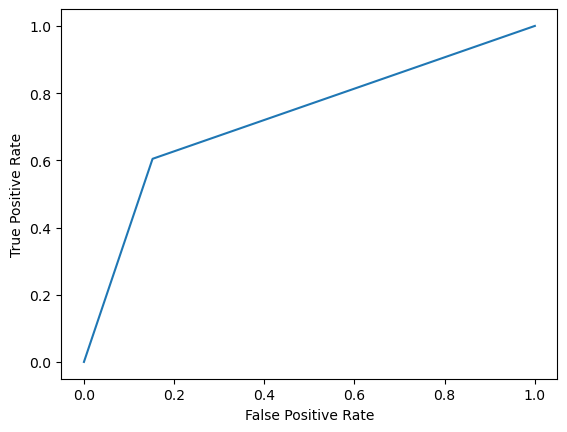

In [138]:
from sklearn.metrics import classification_report
print(classification_report(y_val, lm_preds, target_names=['Not Default', 'Default']))
fpr, tpr, _ = roc_curve(y_val,  lm_preds)
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [139]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint

shallow_nn = Sequential()
shallow_nn.add(InputLayer((x_train.shape[1],)))
shallow_nn.add(Dense(2, 'relu'))
shallow_nn.add(BatchNormalization())
shallow_nn.add(Dense(1, 'sigmoid'))

checkpoint = ModelCheckpoint('shallow_nn', save_best_only=True)
shallow_nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [140]:
shallow_nn.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=5, callbacks=checkpoint)

Epoch 1/5
7500/7500 [==============================] - 6s 713us/step - loss: 0.5449 - accuracy: 0.7161 - val_loss: 0.5231 - val_accuracy: 0.7161
Epoch 2/5
7500/7500 [==============================] - 5s 703us/step - loss: 0.5275 - accuracy: 0.7231 - val_loss: 0.5196 - val_accuracy: 0.7138
Epoch 3/5
7500/7500 [==============================] - 5s 702us/step - loss: 0.5254 - accuracy: 0.7234 - val_loss: 0.5154 - val_accuracy: 0.7193
Epoch 4/5
7500/7500 [==============================] - 5s 672us/step - loss: 0.5249 - accuracy: 0.7229 - val_loss: 0.5195 - val_accuracy: 0.7137
Epoch 5/5
7500/7500 [==============================] - 5s 710us/step - loss: 0.5246 - accuracy: 0.7225 - val_loss: 0.5152 - val_accuracy: 0.7188


In [141]:
def neural_net_predictions(model, x):
    return (model.predict(x).flatten() > 0.5).astype(int)
shallow_nn_preds = neural_net_predictions(shallow_nn, x_val)

625/625 [==============================] - 0s 424us/step


              precision    recall  f1-score   support

 Not Default       0.65      0.83      0.73      9128
     Default       0.81      0.63      0.71     10872

    accuracy                           0.72     20000
   macro avg       0.73      0.73      0.72     20000
weighted avg       0.74      0.72      0.72     20000



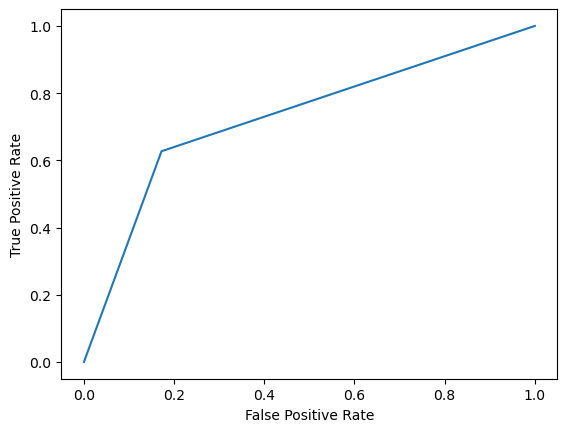

In [142]:
print(classification_report(y_val, shallow_nn_preds, target_names=['Not Default', 'Default']))
fpr, tpr, _ = roc_curve(y_val,  shallow_nn_preds)
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

              precision    recall  f1-score   support

 Not Default       0.65      0.79      0.71      9128
     Default       0.78      0.64      0.70     10872

    accuracy                           0.71     20000
   macro avg       0.71      0.71      0.71     20000
weighted avg       0.72      0.71      0.71     20000



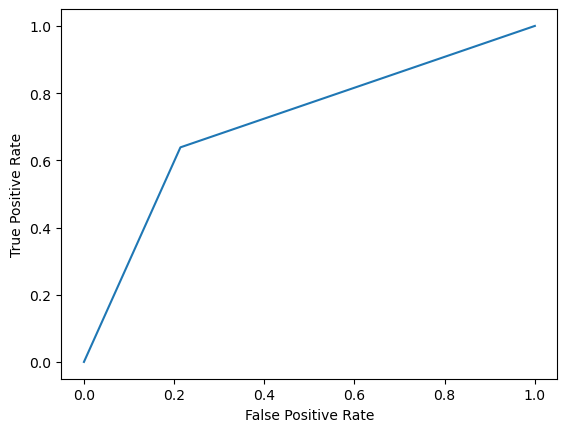

In [143]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.50, max_depth=2, random_state=0)
gbc.fit(x_train, y_train)
gbc_preds = gbc.predict(x_val)
print(classification_report(y_val, gbc_preds, target_names=['Not Default', 'Default']))
fpr, tpr, _ = roc_curve(y_val,  gbc_preds)
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

              precision    recall  f1-score   support

 Not Default       0.64      0.85      0.73      9128
     Default       0.82      0.60      0.70     10872

    accuracy                           0.72     20000
   macro avg       0.73      0.73      0.71     20000
weighted avg       0.74      0.72      0.71     20000



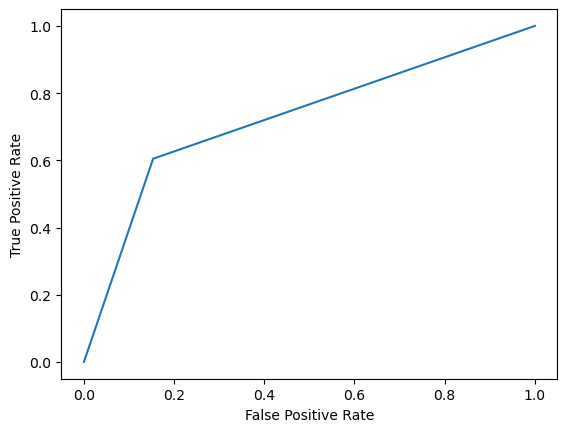

In [144]:
from sklearn.svm import LinearSVC
svc = LinearSVC(class_weight='balanced')
svc.fit(x_train, y_train)
svc_preds = svc.predict(x_val)
print(classification_report(y_val, svc_preds, target_names=['Not Default', 'Default']))
fpr, tpr, _ = roc_curve(y_val,  svc_preds)
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

              precision    recall  f1-score   support

 Not Default       0.61      0.89      0.72      9128
     Default       0.85      0.52      0.64     10872

    accuracy                           0.69     20000
   macro avg       0.73      0.70      0.68     20000
weighted avg       0.74      0.69      0.68     20000



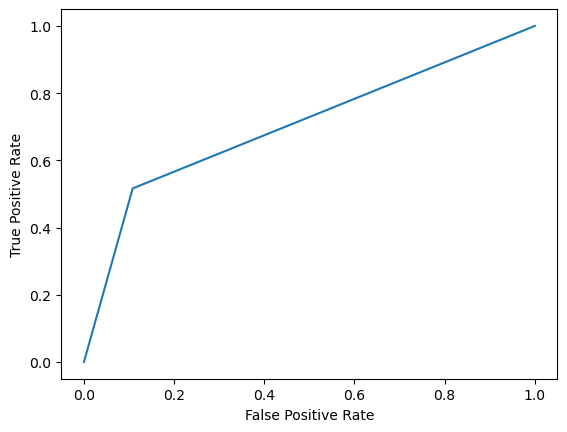

In [145]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=2, n_jobs=-1)
rf.fit(x_train, y_train)
rf_preds = rf.predict(x_val)
print(classification_report(y_val, rf_preds, target_names=['Not Default', 'Default']))
fpr, tpr, _ = roc_curve(y_val,  rf_preds)
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [146]:
shallow_nn_preds_test = neural_net_predictions(shallow_nn, x_test)

1250/1250 [==============================] - 1s 426us/step


              precision    recall  f1-score   support

 Not Default       0.67      0.82      0.74     19188
     Default       0.80      0.63      0.70     20812

    accuracy                           0.72     40000
   macro avg       0.73      0.73      0.72     40000
weighted avg       0.74      0.72      0.72     40000



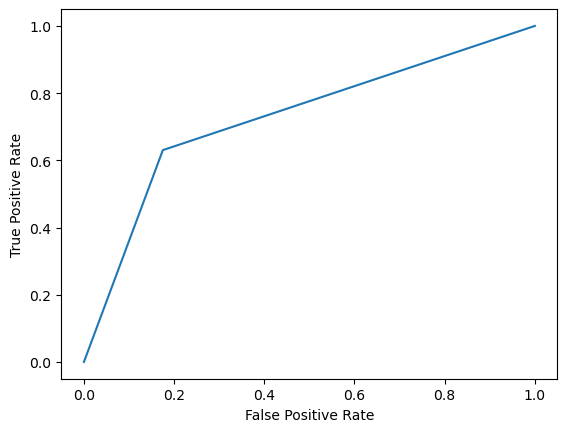

In [147]:
print(classification_report(y_test, shallow_nn_preds_test, target_names=['Not Default', 'Default']))
fpr, tpr, _ = roc_curve(y_test,  shallow_nn_preds_test)
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()